# Local Binary Pattern

by : Fadhil Yori Hibatullah (2103161037) - 2 D3 IT B

----------------------------------------

## Import Library

In [1]:
import cv2 # OpenCV
import numpy as np # NumPy
from matplotlib import pyplot as plt # Matplotlib

## Mendefinisikan Fungsi

### Fungsi untuk mendapatkan nilai pinggir untuk lbp pada gambar

In [2]:
def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

### Fungsi untuk menghitung lbp pada pixel

In [3]:
def lbp_calculated_pixel(img, x, y):
    '''
    Format : 
    
     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4    
    '''    
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y))       # top
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val   

### Fungsi untuk menampilkan output

In [4]:
def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure(figsize=(20, 6))
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        if current_type == "gray":
            current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color = "black")
            current_plot.set_xlim([0,260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)            
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list,rotation = 90)
        elif current_type == "normal":
            current_plot.imshow(current_img)
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)

    plt.show()

### Fungsi main

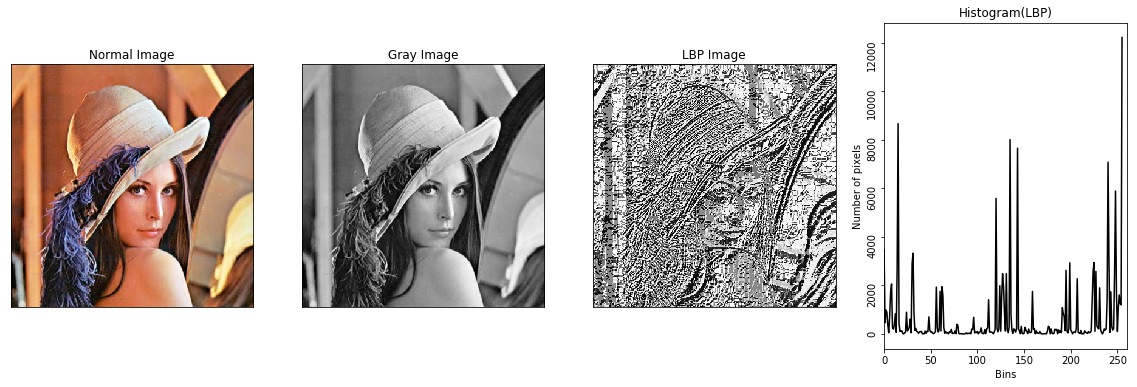

In [5]:
image_file = 'lenna.jpg'
img_bgr = cv2.imread(image_file)
height, width, channel = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
img_lbp = np.zeros((height, width,3), np.uint8)
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
output_list = []
output_list.append({"img": cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Normal Image",
                    "type": "normal"
                   })
output_list.append({"img": img_gray,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Gray Image",
                    "type": "gray"
                   })
output_list.append({"img": img_lbp,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "LBP Image",
                    "type": "gray"
                   })
output_list.append({"img": hist_lbp,
                    "xlabel": "Bins",
                    "ylabel": "Number of pixels",
                    "xtick": None,
                    "ytick": None,
                    "title": "Histogram(LBP)",
                    "type": "histogram"
                   })

show_output(output_list)
                             
cv2.waitKey(0)
cv2.destroyAllWindows()
print("LBP Program is finished")

## Try with different image

LBP Program is finished


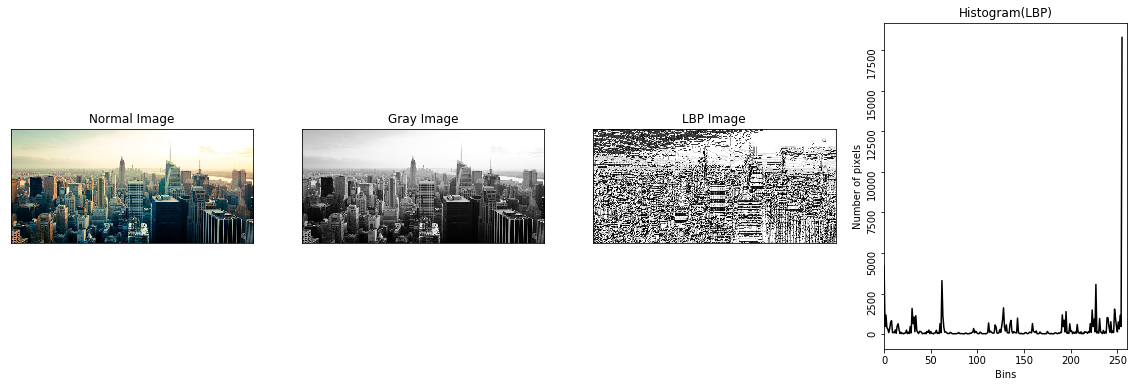

LBP Program is finished


In [6]:
image_file = 'gambar4.jpg'
img_bgr = cv2.imread(image_file)
height, width, channel = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
img_lbp = np.zeros((height, width,3), np.uint8)
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
output_list = []
output_list.append({"img": cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Normal Image",
                    "type": "normal"
                   })
output_list.append({"img": img_gray,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Gray Image",
                    "type": "gray"
                   })
output_list.append({"img": img_lbp,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "LBP Image",
                    "type": "gray"
                   })
output_list.append({"img": hist_lbp,
                    "xlabel": "Bins",
                    "ylabel": "Number of pixels",
                    "xtick": None,
                    "ytick": None,
                    "title": "Histogram(LBP)",
                    "type": "histogram"
                   })

show_output(output_list)
                             
cv2.waitKey(0)
cv2.destroyAllWindows()
print("LBP Program is finished")